# Testing reward function

In [1]:
import numpy as np

def dist_reward(current,goal,lb,ub):
    dist_reward = (abs(goal - current) / max(abs(goal)-lb,abs(goal-ub))) ** 0.4
    return dist_reward

def velocity_discount(current,goal,lb,ub,v,ub_v):
    discount = pow(1 - max(abs(v)/abs(ub_v),0.1),1/max(dist_reward(current,goal,lb,ub),0.1))
    print(1 - max(abs(v)/abs(ub_v),0.1),',', 1/max(dist_reward(current,goal,lb,ub),0.1))
    return discount

def partial_reward(current,goal,lb,ub,v,ub_v):
    partial_reward = 0.
    for i in range(len(goal)):
        temp = dist_reward(current[i],goal[i],lb[i],ub[i]) * velocity_discount(current[i],goal[i],lb[i],ub[i],v[i],ub_v[i])
#         print('i: ',i,'dist_reward: ',dist_reward(current[i],goal[i],lb[i],ub[i]))
#         print('i: ',i,'velocity_discount: ',velocity_discount(current[i],goal[i],lb[i],ub[i],v[i],ub_v[i]))
        print('i: ',i,'reward: ',temp)
        partial_reward += temp
    return partial_reward

# reward = (1 - .3*partial_reward(self.sim.pose[:3],self.target_pos, \
#         self.sim.lower_bounds,self.sim.upper_bounds, self.sim.v[:3],[10,10,50])) \
#         / self.action_repeat

In [2]:
print(partial_reward([-2.18193136417477,12.3959968182252,98.4305036639498],[0.,0.,150.],[-150.,-150.,0.],[150.,150.,300.],[-1.64658053171967,10.4537204202137,-40.7476190582335],[10.,10.,50.]
))

0.835341946828033 , 5.431253448989256
i:  0 reward:  0.06929869984749458
-0.04537204202137013 , 2.710965065798703
i:  1 reward:  (-5.18278233127182e-05+6.639936158608433e-05j)
0.18504761883533005 , 1.5327783153880448
i:  2 reward:  0.049139268973168476
(0.11838614099735034+6.639936158608433e-05j)


In [3]:
print(partial_reward([13.4054518375714,-15.3832524780623,40.9805855166872],[0.,0.,150.],[-150.,-150.,0.],[150.,150.,300.],[-2.87390394812992,6.38654794848524,-55.7208822186624],[10.,10.,50.]
))

0.712609605187008 , 2.627386238974489
i:  0 reward:  0.15626459352940747
0.36134520515147606 , 2.486664740983831
i:  1 reward:  0.03199511863776594
-0.11441764437324808 , 1.1361481497188075
i:  2 reward:  (-0.06821399360337263-0.031096494272522153j)
(0.12004571856380078-0.031096494272522153j)


In [4]:
print(pow(-.0453720420213701 , 2.710965065798703))

(-0.00014050341843716645+0.00018000634965121068j)


In [5]:
a = [800.9,900.1111,878.222,908.12]

In [8]:
print('{:f}'.format(a))

TypeError: unsupported format string passed to list.__format__

In [9]:
print(np.around(a,decimals = 2))

[ 800.9   900.11  878.22  908.12]


In [18]:
print('test:{0:03d}_{1:02d}'.format(10,2))

test:010_02


NameError: name 'plt' is not defined

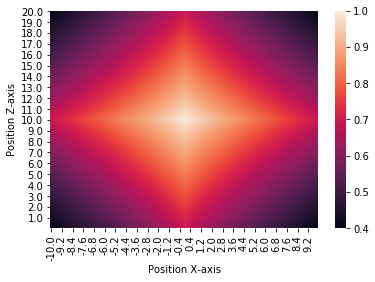

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


def dist_reward(current,goal,lb,ub):
            dist_reward = (abs(goal - current) / max(abs(goal-lb),abs(goal-ub))) ** 0.9
            return dist_reward

def partial_reward(current,goal,lb,ub):
    partial_reward = 0.
    for i in range(len(goal)):
        temp = dist_reward(current[i],goal[i],lb[i],ub[i])
        partial_reward += temp
    return partial_reward

def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)

    return R


reward_function = lambda pose, target_pos: 1 - .3*partial_reward(pose,target_pos,
                lower_bounds,upper_bounds)

x_range = np.round(np.arange(-10.0,10,0.1), 2)
z_range = np.round(np.arange(20,0,-0.1), 2)

target_pos = np.array([0, 10])
lower_bounds=[-10,0]
upper_bounds=[10,20]

R = map_function(reward_function, x_range, z_range, target_pos)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")
plt.show()

In [31]:
a=[[1,2],[3,4]]

In [32]:
print(a[0])

[1, 2]


In [36]:
print([row[0] for row in a])

[1, 3]
